In [38]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Step 2: Load Dataset
data = pd.read_csv("/content/drive/MyDrive/Supermart Grocery Sales - Retail Analytics Dataset.csv")
print(" Dataset Loaded Successfully!\n")
print(data.head())

 Dataset Loaded Successfully!

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [40]:
data.isna().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


# Data Preprocessing

In [42]:
# Strip whitespace from headers
data.columns = data.columns.str.strip()

# Remove spaces / dashes / invalid chars in numeric columns
for col in ['Sales', 'Discount', 'Profit']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop completely empty or invalid rows
data.dropna(subset=['Sales', 'Discount', 'Profit'], inplace=True)

# Convert Order Date
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data.dropna(subset=['Order Date'], inplace=True)

# Add time features
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Day'] = data['Order Date'].dt.day

# Clean categorical columns (remove extra spaces)
cat_cols = ['Category', 'Sub Category', 'City', 'Region', 'State', 'Customer Name']
for c in cat_cols:
    data[c] = data[c].astype(str).str.strip()

print(" Cleaned dataset shape:", data.shape)
print(data.dtypes)


 Cleaned dataset shape: (4042, 14)
Order ID                 object
Customer Name            object
Category                 object
Sub Category             object
City                     object
Order Date       datetime64[ns]
Region                   object
Sales                     int64
Discount                float64
Profit                  float64
State                    object
Order Year                int32
Order Month               int32
Order Day                 int32
dtype: object


In [43]:
# Step 3: Data Preprocessing
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

# EDA

/tmp/ipython-input-2222414911.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=data, estimator='sum', ci=None, palette='coolwarm')
/tmp/ipython-input-2222414911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=data, estimator='sum', ci=None, palette='coolwarm')


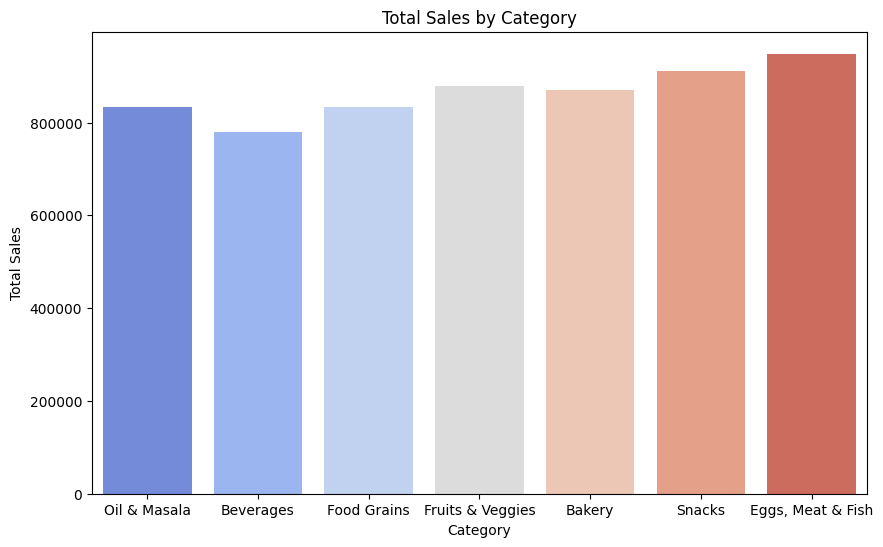

/tmp/ipython-input-2222414911.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=data, estimator='sum', ci=None, palette='viridis')
/tmp/ipython-input-2222414911.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=data, estimator='sum', ci=None, palette='viridis')


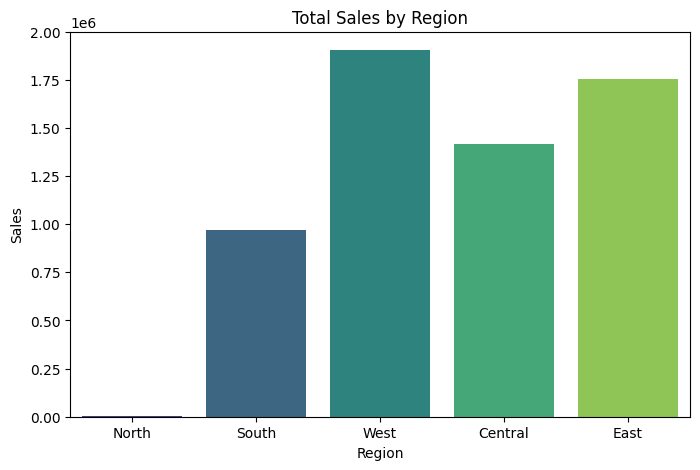

/tmp/ipython-input-2222414911.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sub.values, y=top_sub.index, palette='magma')


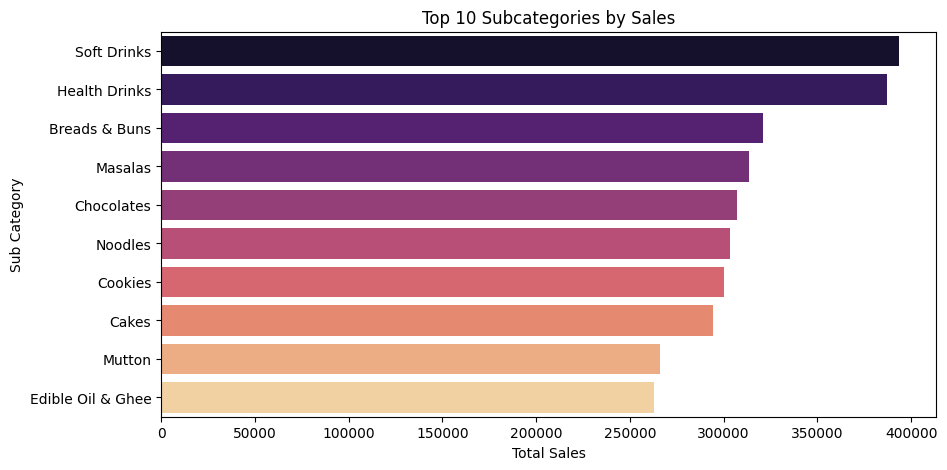

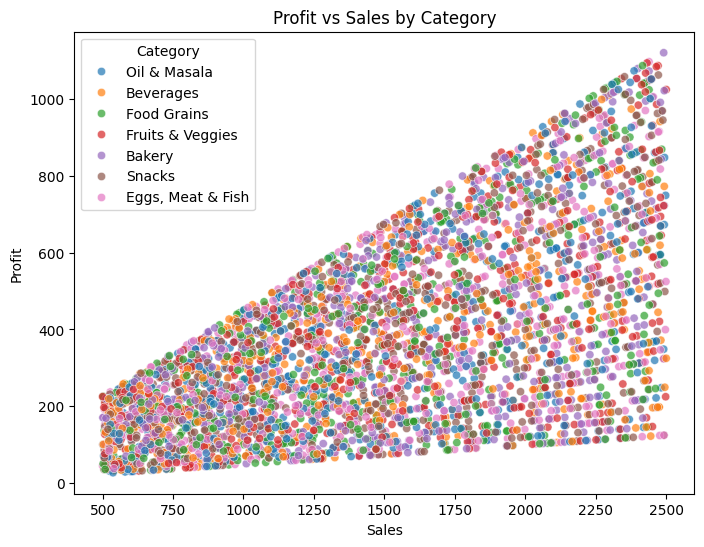

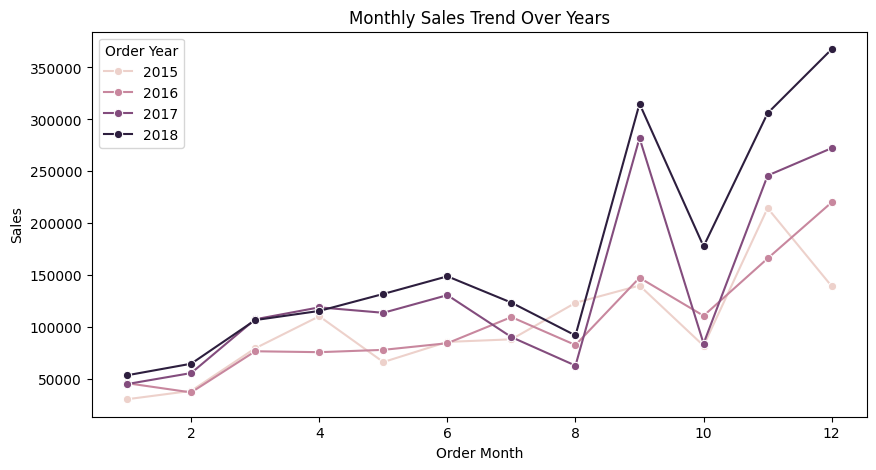

In [44]:
# 1️ Category-wise Sales
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', data=data, estimator='sum', ci=None, palette='coolwarm')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

# 2️ Region-wise Sales
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales', data=data, estimator='sum', ci=None, palette='viridis')
plt.title('Total Sales by Region')
plt.show()

# 3️ Top 10 Subcategories
top_sub = data.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_sub.values, y=top_sub.index, palette='magma')
plt.title('Top 10 Subcategories by Sales')
plt.xlabel('Total Sales')
plt.show()

# 4️ Profit vs Sales scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x='Sales', y='Profit', data=data, hue='Category', alpha=0.7)
plt.title('Profit vs Sales by Category')
plt.show()

# 5️ Monthly Sales Trend
monthly_sales = data.groupby(['Order Year','Order Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x='Order Month', y='Sales', hue='Order Year', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend Over Years')
plt.show()


# Model Trainig and Evaluation

In [45]:
# Encode Categorical Features
le = LabelEncoder()
cat_cols = ['Category', 'Sub Category', 'City', 'Region', 'State']
for col in cat_cols:
    data[col] = le.fit_transform(data[col])


In [46]:
# Step 4: Feature Selection
features = data.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales', 'Order Month'])
target = data['Sales']

In [47]:
# Step 5: Train–Test Split and Scaling
# Drop rows with NaN values before splitting and scaling
features.dropna(inplace=True)
target = target[features.index] # Ensure target aligns with features after dropping NaNs

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Step 6: Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [49]:
# Step 7: Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [50]:
# Step 8: XGBoost Model
xgb_model = XGBRegressor(
    n_estimators=250,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


Correlation Matrix:
              Sales    Profit  Discount
Sales     1.000000  0.604189 -0.017099
Profit    0.604189  1.000000 -0.019310
Discount -0.017099 -0.019310  1.000000

Unique Categories:

Category : 7 unique values
Sub Category : 23 unique values
Region : 5 unique values

Zero-variance columns:
 State    1
dtype: int64

Sales summary:
 count    4042.000000
mean     1497.649678
std       574.053006
min       500.000000
25%      1008.000000
50%      1494.500000
75%      1998.750000
max      2500.000000
Name: Sales, dtype: float64


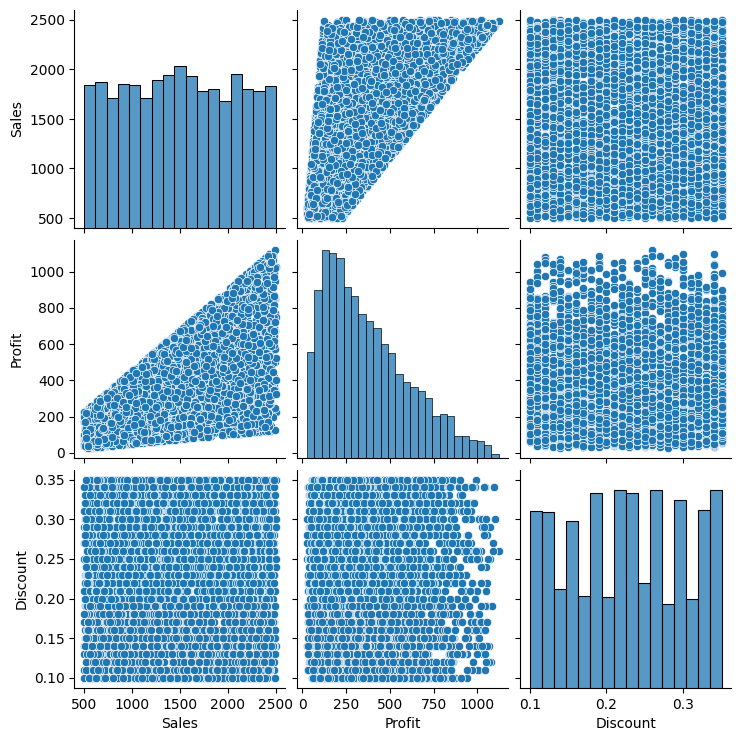

In [51]:
# Correlation check
num_cols = ['Sales', 'Profit', 'Discount']
print("\nCorrelation Matrix:\n", data[num_cols].corr())

# Basic distribution
print("\nUnique Categories:\n")
for col in ['Category','Sub Category','Region']:
    print(col, ":", data[col].nunique(), "unique values")

# Detect constant or near-constant columns
print("\nZero-variance columns:\n", data.nunique()[data.nunique()==1])

# Detect abnormal sales values
print("\nSales summary:\n", data['Sales'].describe())

# Visual check
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data[['Sales','Profit','Discount']])
plt.show()


In [37]:
# Step 9: Model Evaluation
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return pd.Series({"Model": model_name, "MSE": mse, "R²": r2})

results = pd.concat([
    evaluate_model(y_test, lr_pred, "Linear Regression"),
    evaluate_model(y_test, rf_pred, "Random Forest"),
    evaluate_model(y_test, xgb_pred, "XGBoost")
], axis=1).T.set_index("Model")

print("\n Model Comparison:\n")
print(results)



 Model Comparison:

                             MSE        R²
Model                                     
Linear Regression  211117.335133  0.368904
Random Forest      217576.705306  0.349594
XGBoost               257361.125  0.230666


# Conclusion

Final Conclusion

The Supermart Grocery Sales dataset provided insights into customer purchasing trends and sales performance across different product categories and regions. Through Exploratory Data Analysis (EDA), it was observed that:

1. Egg, Meat & Fish and Fruits & Veggies categories contributed the highest sales.

2. The South and West regions showed comparatively higher sales volumes.

3. Sales generally increased over months and years, indicating consistent business growth and seasonal demand patterns.

4. Profit and Sales showed a moderate correlation, suggesting profitability rises with higher sales, while Discount had negligible impact on sales.

In the Machine Learning analysis, models such as Linear Regression, Random Forest, and XGBoost were implemented to predict sales. However, due to the limited numerical relationship between the available features and the target variable, the predictive accuracy remained low.

Despite this, the project successfully demonstrated the complete data analytics workflow — from data cleaning, preprocessing, and EDA to model training and evaluation.
It highlights the importance of feature richness and data quality in predictive modeling and showcases how data-driven insights can support strategic business decisions in retail analytics.